# Fundementals of Data Analysis Practical Assignment - Anscombes Quartet

## 1.0 Background of the Dataset

### 1.1. Who created the dataset?

![Frank Anscombe](http://www.webcitation.org/getfile.php?fileid=25f1b121ddd81fe1719b9e155d8866a45f89f72f)

Anscombe's Dataset was created by Francis (Frank) Anscombe, an English statistician who recieved a first class honours degree and master's in mathermatics from Cambridge University where went on to lecture at. He later moved to Princeton University and then went on to become the founding chairman of the statistics department at Yale University which he headed for six years. During World War 2 he worked on mathematical aspects of firing rockets which was used to calculate firing solution for rockets on D-Day. See https://www.webcitation.org/6OUhHPyy3?url=http://www.yale.edu/opa/arc-ybc/v30.n9/story11.html

He was a pioneer in the application of computers to the statistical analysis of data, and argued persuasively that residuals (the difference between the observed dependant variable and predicted variable) be examined to diagnose the applicability of a postulated model in linear regression.

Anscombe argued for the importance of graphing data rather than solely relying on numerical statistics when analysing data and that "a computer should make both calculations and graphs". Calculations may be misleading and graphs should be used check whether assumptions based on such calculations are reasonably correct. He created the dataset we are examing in this project in order to demonstrate this.

### 1.2. When was it created?

The dataset was first published in 1973 in the journal "The American Statistician" as part of an article titled "Graphs in Statistical Analysis" available here: http://ww.w.lithoguru.com/scientist/statistics/Anscombe_Graphs%20in%20Statistical%20Analysis_1973.pdf

### 1.3. Speculation on the origins of the dataset

I could not find any good sources of speculation on where the dataset came from or how it was created. From my own research I have developeed two possible theories:

**1. Public School Expenditure**

Anscombe mentions a yet to be published paper on per capita expenditure on public schools in each of the 50 US states and Washington DC. He states in the article that "Expenditure had a satisfactory linear regression on three likely predictor variables". He goes on to note that Alaska was an outlier that contributed heavily to the regression relation. He also notes that several other states were extraordinary. It might be that seeing this data inspired Anscombe to create data along the same lines or he may have repurposed some of this data for his dataset.

**2. Genetic Statistics**
Anscombe spent two years working in the Rothamstead Research which is an agricultural research institution. It was a major centre for research in statistics and genetics counting Ronald Fisher (of Iris Dataset fame) as another alumnus. Anscombe might have been inspired by Fisher to create a dataset based on biological data. For example, a more recent 2007 article from The American Statistician titled *"Generating Data with Identical Statistics but Dissimilar Graphics - A Follow up to the Anscombe Dataset"* (available here: https://www.scribd.com/document/10158752/More-on-Anscombe-Datasets) demonstrates how to create datasets with similar descriptive statistics but different appearances when visualised by using a "genetic algorithm". It might be that Anscombe used a similar procedure.

## 2.0 Calculating the Descriptive Statistics

While I am aware that the assignment's Problem Statement asks that we plot the data first and then calculate the descriptive statistics, I thought it my be more interesting to get the descriptive statistics first and demonstrate how we can be lead astray before showing how the data appears when charted.

Anscombe's Quartet was shown in the below format in the original 1973 article: 

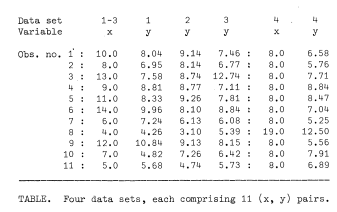

The "x" values for the first three datasets were identical with the "y" values differing. The fourth subset has a unique set of "x" and "y" values.

Conveniently, the Python graphing package Seaborn has Anscombes Quartet in it's library of datasets by default, which means we don't have to search for a CSV version or create one ourselves.

I will first look at the dataset as a whole before calculating the descriptive statistics for the four subsets of the data.

### 2.1. Descriptive Statistics for the Combined Dataset 

Before beginning I will import the Python packages I will need for this assignment.

In [1]:
import seaborn as sns # Data visualisation tool that comes with a copy of the dataset in it's library and regression plots
import pandas as pd # Tool for manipulating the dataset and creating subsets
import matplotlib.pyplot as plt # The basic Python graphing tool that Seaborn is built upon
import numpy as np # For use in shuffling / randomizing data and generating normal distribution graph
import scipy.stats as stats # Used for calculating the normal distribution by getting mean and std for x and y values
from sklearn import linear_model # Used for performing linear regression on the combined dataset along with Seaborn

Then we can load the "anscombe" dataset from Seaborn. The dataset is saved as a Pandas dataframe by default. 

In [2]:
# Load the example dataset for Anscombe's quartet
anscombedf = sns.load_dataset("anscombe")

print(anscombedf)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

As we can see the dataframe is in a different format to Anscombe's original. It has been transposed in the three columns with the first columns' values showing the 4 subsets followed by the "x" and "y" values.

#### 2.1.1. Descriptive Statistics

**Pandas df.Describe**

We can get several descriptive statistics for the dataset by using Pandas "describe".

In [3]:
anscombedf.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


The above table tells us:
* There are 44 "x" values and 44 "y" values.
* The mean (average) of the "x" values is 9 and the mean of the "y" values is 7.5.
* The standard deviation is 3.20 for "x" and 1.96 for "y".
    * We will use the standard deviation and mean to show that the data is normally distributed later.
* The lowest values for "x" and "y" are 4.00 and 3.10 respectively.
* The max values for "x" and "y" are 19.00 and 12.74 respecitively.
* The percentile values are also close to the mean indicating a normal distribution

**Mode**

In [31]:
anscombedf.mode(axis=0)

,x,y
0,8.0,8.84


Pandas' "Mode" function calculates the mode for each column in the dataframe. 8 is the most common "x" value thanks to subset IV. 8.84 is the most common "y" value as it is the only value that appears more than once.

**Median**

In [5]:
anscombedf.median()

x    8.00
y    7.52
dtype: float64

Pandas' median value returns the midpoint value for "x" and "y" which is 8 and 7.52 respectively. As these values are almost identical to the mean in both cases, you would not expect the presence of any outliers.

**Kurtosis**

In [6]:
anscombedf.kurtosis()

x    0.835279
y    0.908602
dtype: float64

Values are relatively close to zero which would again give the impression that there are no outliers.

**Skewness**

In [7]:
anscombedf.skew()

x    0.736875
y    0.439346
dtype: float64

Similar to the kurtosis values above, both values are relatively close to zero meaning that data should be fairly symetrical when graphed. The "x" values are moderately skewed, but not by enough to raise any alarm bells.

**Corrolation**

In [8]:
anscombedf.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


Pandas' df.corr function give the Pearson corrolation coefficient for each "x" and "y". The corrolation coeficient of 0.82 normally indicates that the values have a storn positive linear relationship, meaning that as one increases the other should increase at the same rate. We can see this repeated in the linear regression results below.

### Plot Normal Distribution

X MEAN: 9.0 X STD: 3.1622776601683795


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


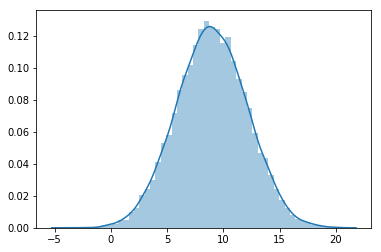

In [10]:
from scipy.stats import norm

norm_X= anscombedf["x"].values
mu, std = norm.fit(norm_X) # norm.fit returns the mean and standard deviation to create the normal distribution
print("X MEAN:",mu ,"X STD:",std)

x = np.random.normal(mu, std, 10000)
sns.distplot(x, hist=True)


Y MEAN: 7.500681818181818 Y STD: 1.9365367373545919


C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


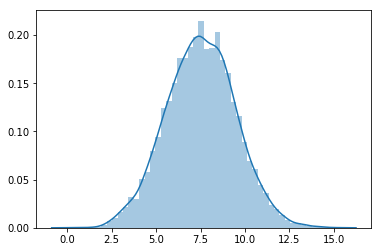

In [11]:
norm_Y = anscombedf["y"].values
mu, std = norm.fit(norm_Y) # norm.fit returns the mean and standard deviation to create the normal distribution
print("Y MEAN:",mu ,"Y STD:",std)

x = np.random.normal(mu, std, 10000)
sns.distplot(x, hist=True)

### Performing linear regression on dataset.

In [12]:
#shuffle dataset before training

shuffled_df = anscombedf.iloc[np.random.permutation(len(anscombedf))]
shuffled_df

,dataset,x,y
26,III,11.0,7.81
12,II,8.0,8.14
11,II,10.0,9.14
37,IV,8.0,8.47
28,III,6.0,6.08
0,I,10.0,8.04
27,III,14.0,8.84
42,IV,8.0,7.91
9,I,7.0,4.82
38,IV,8.0,7.04


In [13]:
# split df into x and y 

reg_X = shuffled_df["x"].values
reg_Y = shuffled_df["y"].values

#Reshape Arrays
reg_X = reg_X.reshape(len(reg_X),1)
reg_Y = reg_Y.reshape(len(reg_Y),1)
# take a training sample

train_X = reg_X[:22]
train_Y = reg_Y[:22]

# take a testing sample for later
test_X = reg_X[:-22]
test_Y = reg_Y[:-22]

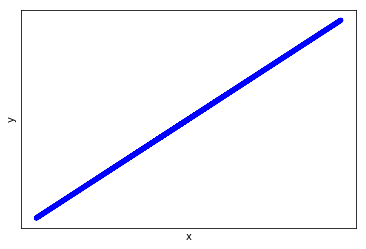

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(train_X, train_Y)

#plt.scatter(test_X, test_Y,  color='black')
plt.plot(test_X, regr.predict(test_X), color='blue', linewidth=5)
plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Looking at the results for the linear regression you would assume that the x and y values in each of the datasets and the combined dataset as a whole are positive corrolated, meaning that as x increases y increases.

### Summary statistics for the subdatasets

Set the "dataset" column as the index to allow for creation of subset dataframes.

In [15]:
anscombedf.set_index("dataset", inplace=True)


Group into invidual datasheet based on dataset column values.

In [16]:
Idf = anscombedf.loc["I"]
IIdf = anscombedf.loc["II"]
IIIdf = anscombedf.loc["III"]
IVdf = anscombedf.loc["IV"]

Display tables side by side. Function taken from: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

In [17]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [18]:
display_side_by_side(Idf,IIdf,IIIdf,IVdf)

,x,y
dataset,,
I,10.0,8.04
I,8.0,6.95
I,13.0,7.58
I,9.0,8.81
I,11.0,8.33
I,14.0,9.96
I,6.0,7.24
I,4.0,4.26
I,12.0,10.84


Show summary statistics for each subset dataframe and compare and contrast.

In [19]:
display_side_by_side(Idf.describe(),IIdf.describe(),IIIdf.describe(),IVdf.describe())

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000
,x,y
count,11.000000,11.000000


Given that the standard deviation and mean are almost identical for each dataset for x and y, the probabilty distribution functions would appear the same as for the dataset as a whole when charted. I'll spare you charting this 8 times.

In [20]:
display_side_by_side(Idf.mode(),IIdf.mode(),IIIdf.mode(),IVdf.mode())

,x,y
0,4.0,4.26
1,5.0,4.82
2,6.0,5.68
3,7.0,6.95
4,8.0,7.24
5,9.0,7.58
6,10.0,8.04
7,11.0,8.33
8,12.0,8.81
9,13.0,9.96


Display corrolation coefficient side by side.

In [21]:
display_side_by_side(Idf.corr(),IIdf.corr(),IIIdf.corr(),IVdf.corr())

,x,y
x,1.000000,0.816421
y,0.816421,1.000000
,x,y
x,1.000000,0.816237
y,0.816237,1.000000
,x,y
x,1.000000,0.816287
y,0.816287,1.000000
,x,y
x,1.000000,0.816521


Display covariance coefficient side by side

In [22]:
display_side_by_side(Idf.cov(),IIdf.cov(),IIIdf.cov(),IVdf.cov())

,x,y
x,11.000,5.501000
y,5.501,4.127269
,x,y
x,11.0,5.500000
y,5.5,4.127629
,x,y
x,11.000,5.49700
y,5.497,4.12262
,x,y
x,11.000,5.499000


In [23]:
med_Idf = pd.DataFrame(Idf.median())
med_IIdf = pd.DataFrame(IIdf.median())
med_IIIdf = pd.DataFrame(IIIdf.median())
med_IVdf = pd.DataFrame(IVdf.median())
display_side_by_side(med_Idf,med_IIdf,med_IIIdf,med_IVdf)

,0
x,9.00
y,7.58
,0
x,9.00
y,8.14
,0
x,9.00
y,7.11
,0
x,8.00


In [24]:
kurt_Idf = pd.DataFrame(Idf.kurtosis())
kurt_IIdf = pd.DataFrame(IIdf.kurtosis())
kurt_IIIdf = pd.DataFrame(IIIdf.kurtosis())
kurt_IVdf = pd.DataFrame(IVdf.kurtosis())
display_side_by_side(kurt_Idf,kurt_IIdf,kurt_IIIdf,kurt_IVdf)

,0
x,-1.200000
y,-0.534898
,0
x,-1.200000
y,0.846123
,0
x,-1.200000
y,4.384089
,0
x,11.000000


In [25]:
skew_Idf = pd.DataFrame(Idf.skew())
skew_IIdf = pd.DataFrame(IIdf.skew())
skew_IIIdf = pd.DataFrame(IIIdf.skew())
skew_IVdf = pd.DataFrame(IVdf.skew())
display_side_by_side(skew_Idf, skew_IIdf, skew_IIIdf, skew_IVdf)

,0
x,0.000000
y,-0.065036
,0
x,0.000000
y,-1.315798
,0
x,0.000000
y,1.855495
,0
x,3.316625


## Plotting Dataset to Show Differences

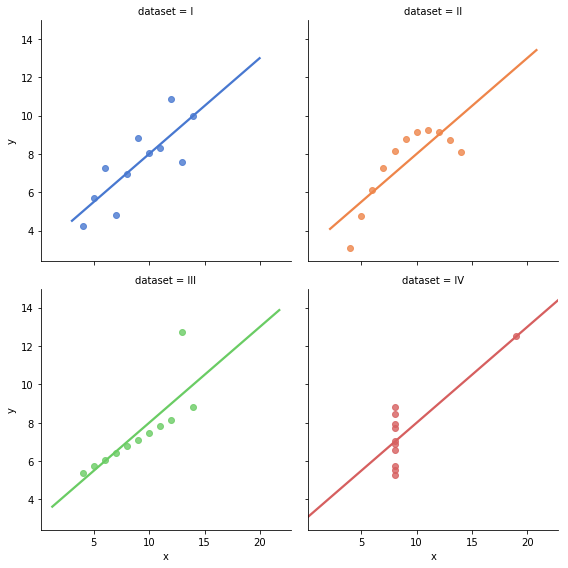

In [26]:
reset = anscombedf.reset_index()
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=reset,
           col_wrap=2, ci=None, palette="muted", height=4)

Outliers in III and IV give a false impression of correlation between x and y.

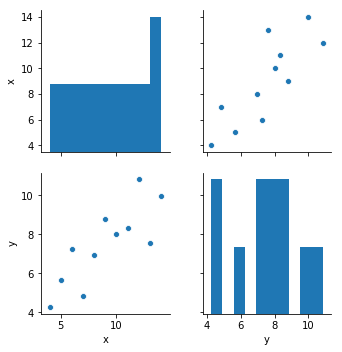

In [27]:
Idfpairplot = sns.pairplot(Idf)
plt.show(Idfpairplot)

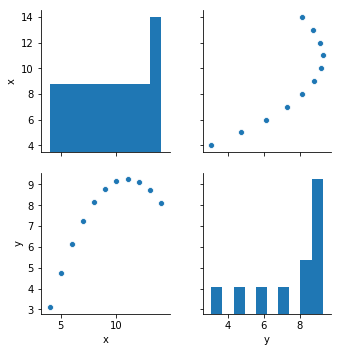

In [28]:
IIdfpairplot = sns.pairplot(IIdf)
plt.show(IIdfpairplot)

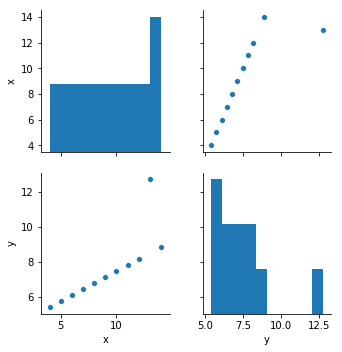

In [29]:
IIIdfpairplot = sns.pairplot(IIIdf)
plt.show(IIIdfpairplot)

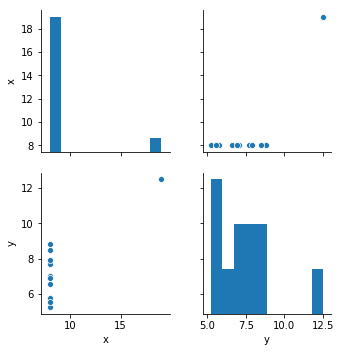

In [30]:
IVdfpairplot = sns.pairplot(IVdf)
plt.show(IVdfpairplot)